# Experiments with optimizer

In [6]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.utils as model_utils
import km3net.model.eval as model_eval
import km3net.data.utils as data_utils
import km3net.model.data.pm as data_pm
from km3net.model.mlp import MLP
from torch.nn import BCELoss
from torch.optim import SGD, Adam
import torch
import pandas as pd

## Experiment 1: SGD
lr reduced to 0.0001

### Parameters
- Data: 50% of slice 615 (equalized classes, diff)
- Loss: BCELoss
- Optimizer: SGD(lr=0.0001)
- Layers: (4, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 10

### Remarks
Similar results to baseline.

In [9]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.0001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 100,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.043, valid loss: 0.043
epochs: 1, train loss: 0.043, valid loss: 0.042
epochs: 2, train loss: 0.042, valid loss: 0.041
epochs: 3, train loss: 0.040, valid loss: 0.038
epochs: 4, train loss: 0.037, valid loss: 0.035
epochs: 5, train loss: 0.032, valid loss: 0.030
epochs: 6, train loss: 0.027, valid loss: 0.025
epochs: 7, train loss: 0.022, valid loss: 0.020
epochs: 8, train loss: 0.018, valid loss: 0.017
epochs: 9, train loss: 0.016, valid loss: 0.015
epochs: 10, train loss: 0.014, valid loss: 0.013
epochs: 11, train loss: 0.013, valid loss: 0.012
epochs: 12, train loss: 0.012, valid loss: 0.011
epochs: 13, train loss: 0.011, valid loss: 0.011
epochs: 14, train loss: 0.011, valid loss: 0.011
epochs: 15, train loss: 0.010, valid loss: 0.010
epochs: 16, train loss: 0.010, valid loss: 0.010
epochs: 17, train loss: 0.010, valid loss: 0.010
epochs: 18, train loss: 0.010, valid loss: 0.009
epochs: 19, train 

KeyboardInterrupt: 

## Experiment 1a
lr increased to 0.01

### Parameters
- Data: 50% of slice 615 (equalized classes, diff)
- Loss: BCELoss
- Optimizer: SGD(lr=0.01)
- Layers: (4, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 10

### Remarks
Similar results to baseline.

train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.011, valid loss: 0.008
epochs: 1, train loss: 0.009, valid loss: 0.008
epochs: 2, train loss: 0.009, valid loss: 0.009
epochs: 3, train loss: 0.008, valid loss: 0.008
epochs: 4, train loss: 0.008, valid loss: 0.008
epochs: 5, train loss: 0.008, valid loss: 0.008
epochs: 6, train loss: 0.008, valid loss: 0.008
epochs: 7, train loss: 0.008, valid loss: 0.008
epochs: 8, train loss: 0.008, valid loss: 0.008
epochs: 9, train loss: 0.008, valid loss: 0.007
---


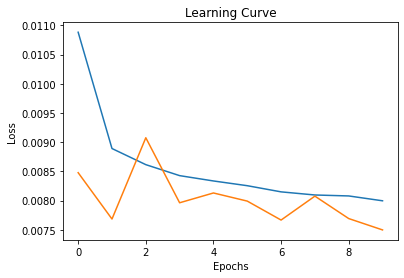

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


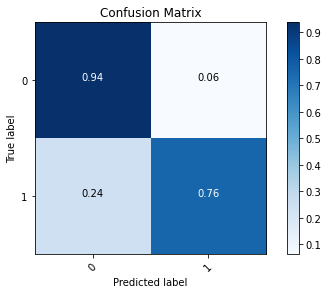

<Figure size 576x576 with 0 Axes>

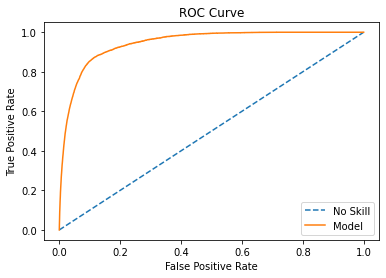

<Figure size 576x576 with 0 Axes>

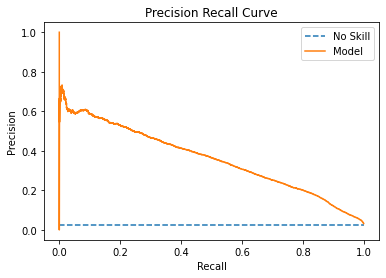

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    355859
         1.0       0.22      0.76      0.34      8372

    accuracy                           0.93    364231
   macro avg       0.61      0.85      0.65    364231
weighted avg       0.98      0.93      0.95    364231

ROC AUC: 0.945
Precision Recall AUC: 0.359
F1 Score: 0.342
F2 Score: 0.510


In [5]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.0001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 2
Use the Adam optimizer

### Parameters
- Data: 50% of slice 615 (equalized classes, diff)
- Loss: BCELoss
- Optimizer: Adam(lr=0.001)
- Layers: (4, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 10

### Remarks
TODO

train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.011, valid loss: 0.008
epochs: 1, train loss: 0.009, valid loss: 0.008
epochs: 2, train loss: 0.009, valid loss: 0.009
epochs: 3, train loss: 0.008, valid loss: 0.008
epochs: 4, train loss: 0.008, valid loss: 0.008
epochs: 5, train loss: 0.008, valid loss: 0.008
epochs: 6, train loss: 0.008, valid loss: 0.008
epochs: 7, train loss: 0.008, valid loss: 0.008
epochs: 8, train loss: 0.008, valid loss: 0.008
epochs: 9, train loss: 0.008, valid loss: 0.007
---


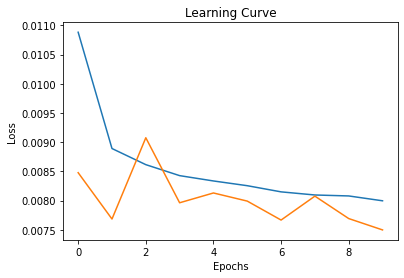

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


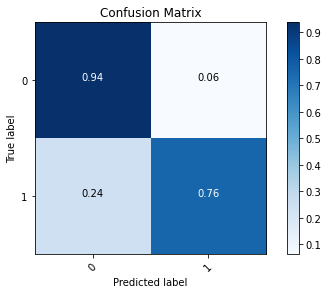

<Figure size 576x576 with 0 Axes>

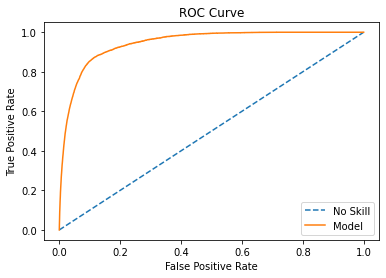

<Figure size 576x576 with 0 Axes>

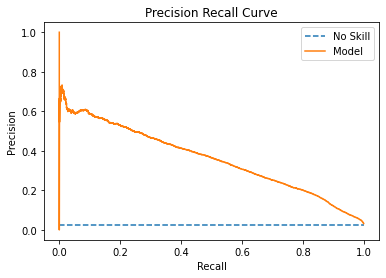

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    355859
         1.0       0.22      0.76      0.34      8372

    accuracy                           0.93    364231
   macro avg       0.61      0.85      0.65    364231
weighted avg       0.98      0.93      0.95    364231

ROC AUC: 0.945
Precision Recall AUC: 0.359
F1 Score: 0.342
F2 Score: 0.510


In [5]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': Adam(model.parameters(), lr=0.0001),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)